# 웹 크롤링

In [1]:
import requests
from bs4 import BeautifulSoup  #크롤링용 라이브러리 설치
import pandas as pd

In [2]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords
from konlpy.tag import Twitter 
from collections import Counter    #워드클라우드 or 한글 자연어처리 라이브러리 설치

In [3]:
df = pd.DataFrame(columns=['리뷰제목', '리뷰본문']) #데이터 프레임 만들기

In [4]:
for page in range(1, 7):
    url = "https://movie.naver.com/movie/bi/mi/review.naver?code=187323&page={}"
    url = url.format(page)        #페이지 별로 검색
    res=requests.get(url)
    soup = BeautifulSoup(res.text, 'lxml')
    
    ul = soup.find('ul', class_="rvw_list_area")   
    lis = ul.find_all('li')
    for li in lis:
        df = df.append({'리뷰제목': li.a.text, 
                        "리뷰본문": li.p.a.text }, ignore_index=True)    #영화 크롤링 하기
    print(df)

                                                  리뷰  \
0  VENOM: LET THERE BE CARNAGE - Official Trailer...   
1                                        정말 최고의 영화에요   
2  [영화감상] 베놈 2: 렛 데어 비 카니지 (Venom: Let There Be C...   
3  [Venom: Let There Be Carnage] 베놈2 : 렛 데어 비 카니지...   
4                   [현금]<베놈2:렛 데어 비 카니지> 쿠키볼려고 보는 영화   
5                1.베놈2 : 렛 데이 비 카니지 후기(스포x), 쿠키영상 한개   
6  [영화 베놈2: 렛 데어 비 카니지 정보&역대급 쿠키&아이맥스 후기] 톰 하디와 심...   
7  앤디 서키스 - 베놈2 : 렛데어비카니지 (Andy Serkis - Venom: L...   
8          강렬한 등장 못지 않은 파괴력과 놀라움, 그에 비례하는 아쉬움 '베놈 2'   
9                  [영화 베놈 2 :렛 데어 비 카니지] 모션 픽쳐 무협 액션   

                                                 줄거리  
0  https://youtu.be/-ezfi6FQ8Ds동영상VENOM: LET THER...  
1  내년에 개봉하는 이 영화는 정말 최고의 영화 입니다.주인공의 연기와 외계인(?) 베...  
2  10월 13일 개봉했었던 영화 '베놈 2 : 렛 데어 비 카니지'입니다. 2018년...  
3  ※ 해당 게시글엔 베놈 2: 렛 데어 비 카니지의 스포일러가 있습니다. 아직 보지 ...  
4  20211013용산 CGV IMAX-D-23만원의 행복3.3/5 히어로의 시대는 끝...  
5  베놈 시리즈만의 독보적인 액션 하나만으로도 영화를 볼 가치가 충분합니다.만화가 원작... 

In [5]:
df   #데이터 프레임 확인하기

,리뷰,줄거리
0,VENOM: LET THERE BE CARNAGE - Official Trailer...,https://youtu.be/-ezfi6FQ8Ds동영상VENOM: LET THER...
1,정말 최고의 영화에요,내년에 개봉하는 이 영화는 정말 최고의 영화 입니다.주인공의 연기와 외계인(?) 베...
2,[영화감상] 베놈 2: 렛 데어 비 카니지 (Venom: Let There Be C...,10월 13일 개봉했었던 영화 '베놈 2 : 렛 데어 비 카니지'입니다. 2018년...
3,[Venom: Let There Be Carnage] 베놈2 : 렛 데어 비 카니지...,※ 해당 게시글엔 베놈 2: 렛 데어 비 카니지의 스포일러가 있습니다. 아직 보지 ...
4,[현금]<베놈2:렛 데어 비 카니지> 쿠키볼려고 보는 영화,20211013용산 CGV IMAX-D-23만원의 행복3.3/5 히어로의 시대는 끝...
5,"1.베놈2 : 렛 데이 비 카니지 후기(스포x), 쿠키영상 한개",베놈 시리즈만의 독보적인 액션 하나만으로도 영화를 볼 가치가 충분합니다.만화가 원작...
6,[영화 베놈2: 렛 데어 비 카니지 정보&역대급 쿠키&아이맥스 후기] 톰 하디와 심...,베놈1편이 개봉한지 3년만에 긴 제목으로 돌아온 영화 베놈2: 렛 데어 비 카니지(...
7,앤디 서키스 - 베놈2 : 렛데어비카니지 (Andy Serkis - Venom: L...,베놈 2: 렛 데어 비 카니지 감독 앤디 서키스 출연...
8,"강렬한 등장 못지 않은 파괴력과 놀라움, 그에 비례하는 아쉬움 '베놈 2'",Doopieces' Movie ReviewNO. 196 베놈 2: 렛 ...
9,[영화 베놈 2 :렛 데어 비 카니지] 모션 픽쳐 무협 액션,[영화 베놈 2 :렛 데어 비 카니지] 모션 픽쳐 무협 액션미블이면서 디즈니에서 독...


In [6]:
df.to_csv("베놈2 리뷰.txt",index=False)    #크롤링 한 파일 저장

In [7]:
file = open('C:/Users/gram/Desktop/베놈2 리뷰.txt', 'r',encoding='UTF8') #저장한 파일 불러오기

In [8]:
lists = file.readlines()   #리스트에 파일 담기
lists

['리뷰,줄거리\n',
 'VENOM: LET THERE BE CARNAGE - Official Trailer (HD),https://youtu.be/-ezfi6FQ8Ds동영상VENOM: LET THERE BE CARNAGE - Official Trailer (HD)We missed you… so much. Sink your teeth into the new #Venom: Let There Be Carnage trailer. Only in theaters September 24Visit ......\n',
 '정말 최고의 영화에요,내년에 개봉하는 이 영화는 정말 최고의 영화 입니다.주인공의 연기와 외계인(?) 베놈의 연기는 정말 최고에요.다만 넷플릭스에서 한국말 더빙은 안해줬으면 해요.몰입도가 너무 떨어집니다.너무 재밋게 잘 볼 예정입니다.감사합니당.아! ...\n',
 '"[영화감상] 베놈 2: 렛 데어 비 카니지 (Venom: Let There Be Carnage, 2021)","10월 13일 개봉했었던 영화 \'베놈 2 : 렛 데어 비 카니지\'입니다. 2018년에 개봉했었던 \'베놈\'의 후속편인데요.. 제목만 봐도 아시겠지만이번편의 \'빌런\'은 최강의 \'심비오트\'라 불리는 \'카니지\'입니다.\'베놈\'의 아들이지만, 엄청 강한데 ..."\n',
 '[Venom: Let There Be Carnage] 베놈2 : 렛 데어 비 카니지 후기 (스포O) : 돌비시네마,※ 해당 게시글엔 베놈 2: 렛 데어 비 카니지의 스포일러가 있습니다. 아직 보지 않으셨다면 주의해 주시길 바랍니다.※ 베놈2 : 렛 데어 비 카니지의 쿠키영상은 1개 입니다. 잊지 말아주시길 바랍니다.[메가박스 오리지널 티켓 / 돌비시...\n',
 '[현금]<베놈2:렛 데어 비 카니지> 쿠키볼려고 보는 영화,"20211013용산 CGV IMAX-D-23만원의 행복3.3/5 히어로의 시대는 끝났다\'베놈\'과 완벽한 파트너가 된 \'에디 브록\'(톰 하디) 앞에 \'클리터스 캐서디\'(

# 형태소 분석

In [9]:
twitter = Twitter() 
morphs = [] 

for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 
print(morphs)                                    #형태소 분석

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[[('리뷰', 'Noun'), (',', 'Punctuation'), ('줄거리', 'Noun'), ('\n', 'Foreign')], [('VENOM', 'Alpha'), (':', 'Punctuation'), ('LET', 'Alpha'), ('THERE', 'Alpha'), ('BE', 'Alpha'), ('CARNAGE', 'Alpha'), ('-', 'Punctuation'), ('Official', 'Alpha'), ('Trailer', 'Alpha'), ('(', 'Punctuation'), ('HD', 'Alpha'), (')', 'Foreign'), (',https://youtu.be/-ezfi6FQ8Ds', 'URL'), ('동영상', 'Noun'), ('VENOM', 'Alpha'), (':', 'Punctuation'), ('LET', 'Alpha'), ('THERE', 'Alpha'), ('BE', 'Alpha'), ('CARNAGE', 'Alpha'), ('-', 'Punctuation'), ('Official', 'Alpha'), ('Trailer', 'Alpha'), ('(', 'Punctuation'), ('HD', 'Alpha'), (')', 'Punctuation'), ('We', 'Alpha'), ('missed', 'Alpha'), ('you', 'Alpha'), ('…', 'Punctuation'), ('so', 'Alpha'), ('much', 'Alpha'), ('.', 'Punctuation'), ('Sink', 'Alpha'), ('your', 'Alpha'), ('teeth', 'Alpha'), ('into', 'Alpha'), ('the', 'Alpha'), ('new', 'Alpha'), ('#Venom', 'Hashtag'), (':', 'Punctuation'), ('Let', 'Alpha'), ('There', 'Alpha'), ('Be', 'Alpha'), ('Carnage', 'Alpha'), ('

# 단어 전처리

In [22]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("의" not in word) and ("에" not in word)and ("이" not in word)and ("입니다"not in word) and("에요"not in word) and("말"not in word) and("렛" not in word) and("데" not in word) and("비" not in word) : 
            noun_adj_adv_list.append(word) 

print(noun_adj_adv_list)                #필요 없는 단어 전처리

['리뷰', '줄거리', '동영상', '최고', '영화', '내년', '개봉', '영화', '최고', '영화', '주인공', '연기', '외계인', '베놈', '연기', '최고', '다만', '넷플릭스', '더빙', '해', '몰입도', '재밋', '볼', '예정', '영화', '감상', '베놈', '카니', '개봉', '영화', '베놈', '카니', '개봉', '베놈', '후', '속편', '요', '제목', '빌런', '은', '최강', '카니', '베놈', '아들', '베놈', '카니', '후기', '스포', '시네마', '해당', '게시', '글', '베놈', '스포일러', '보지', '베놈', '쿠키', '영상', '개', '메가박스', '리지', '널', '티켓', '돌', '현금', '베놈', '카니', '쿠키', '영화', '용산', '행복', '히어로', '시대', '베놈', '과', '파트너', '브록', '톰', '하디', '앞', '클리', '터스', '우디', '해럴슨', '카니', '로', '등장', '앞', '혼돈', '세상', '예고', '혼돈', '시대', '베놈', '카니', '후기', '스포', '쿠키', '영상', '베놈', '시리즈', '독보', '액션', '하나', '영화', '볼', '가치', '만화가', '원작', '만큼', '특유', '만화', '구성', '호불호', '갈릴', '수', '히어로', '영화', '관람', '키포인트', '중', '하나', '매력', '영화', '베놈', '카니', '정보', '역대', '쿠키', '후기', '톰', '하디', '수다', '케미', '베놈', '개봉', '한지', '제목', '영화', '베놈', '카니', '부제', '번역', '대학', '정도', '세', '관람', '가인', '오락', '영화', '제목', '쓰기', '감', '해석', '앤디', '키스', '베놈', '카니', '베놈', '카니', '감독', '앤디', '키스', '출연', '톰', '하디', '미셸

In [26]:
count = Counter(noun_adj_adv_list)
words = dict(count.most_common())            # 각 형태별로 중복되는 횟수 나타내기

# 중복 단어 검색

In [27]:
count
words

{'베놈': 158,
 '카니': 91,
 '영화': 57,
 '개봉': 38,
 '톰': 29,
 '하디': 29,
 '앤디': 26,
 '리뷰': 25,
 '키스': 25,
 '감독': 23,
 '미국': 23,
 '출연': 20,
 '보기': 20,
 '쿠키': 19,
 '미셸': 18,
 '윌리엄스': 18,
 '마블': 15,
 '예고편': 15,
 '영상': 14,
 '차': 14,
 '액션': 10,
 '수': 10,
 '관람': 10,
 '빌런': 9,
 '후기': 9,
 '히어로': 9,
 '우디': 9,
 '해럴슨': 9,
 '평점': 9,
 '오늘': 8,
 '박스오피스': 8,
 '로': 7,
 '보고': 7,
 '국내': 7,
 '중': 6,
 '소니': 6,
 '것': 6,
 '점': 6,
 '한글': 6,
 '동영상': 5,
 '볼': 5,
 '스포일러': 5,
 '시대': 5,
 '캐릭터': 5,
 '날': 5,
 '누적': 5,
 '줄거리': 4,
 '후': 4,
 '제목': 4,
 '은': 4,
 '스포': 4,
 '시네마': 4,
 '편': 4,
 '거': 4,
 '나오미': 4,
 '해리스': 4,
 '극장': 4,
 '공개': 4,
 '개인': 4,
 '위': 4,
 '관객수': 4,
 '돌파': 4,
 '최고': 3,
 '연기': 3,
 '감상': 3,
 '브록': 3,
 '앞': 3,
 '등장': 3,
 '예고': 3,
 '세': 3,
 '실망': 3,
 '전편': 3,
 '개연': 3,
 '탄생': 3,
 '스릴러': 3,
 '를': 3,
 '연출': 3,
 '코로나': 3,
 '독점': 3,
 '포스터': 3,
 '최초': 3,
 '압도': 3,
 '숙적': 3,
 '장가': 3,
 '생각': 3,
 '기사': 3,
 '주차': 3,
 '스토리': 3,
 '주': 3,
 '작': 3,
 '끝': 3,
 '모자': 3,
 '문화': 3,
 '기억': 3,
 '화제': 3,
 '박스': 3,
 '주인공': 2,
 '외계

In [24]:
wordcloud = WordCloud(
    font_path = 'C:/Windows/Fonts/NanumGothic.ttf',    #한글 폰트 설정.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words)

# 워드 클라우드 나타내기

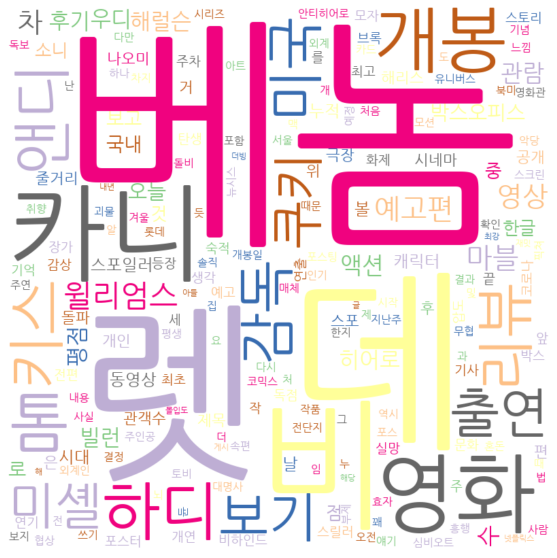

In [25]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('business_anlytics_worldcloud.png')